<a href="https://colab.research.google.com/github/atrbyg24/kilter-board/blob/main/Kilter_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 18.7 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
climb_grades = 'V1','V2','V3','V4','V5', 'V6','V7','V8'
path = Path('gdrive/MyDrive/Data')

In [ ]:
fns = get_image_files(path)
fns

(#12922) [Path('gdrive/MyDrive/Data/V5/6c+-V5-205.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-207.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-208.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-209.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-211.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-212.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-213.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-214.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-215.png'),Path('gdrive/MyDrive/Data/V5/6c+-V5-217.png')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
climbs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
climbs = climbs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = climbs.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.818993,2.112585,0.789861,02:28


epoch,train_loss,valid_loss,error_rate,time
0,2.279605,1.980217,0.778251,03:20
1,1.993044,1.789738,0.741873,03:21
2,1.797414,1.596351,0.698142,03:24
3,1.719348,1.582784,0.678793,03:24
4,1.656273,1.556225,0.681502,03:20


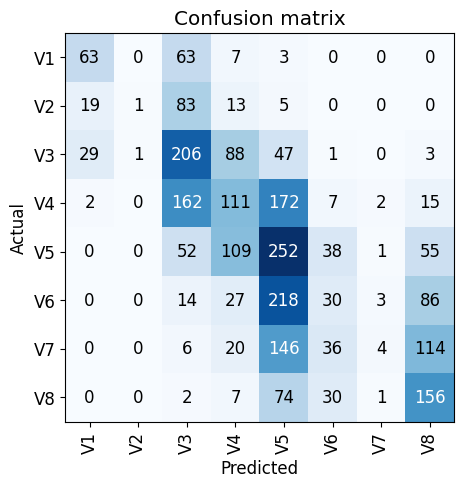

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn2 = vision_learner(dls, resnet50, metrics=error_rate)
learn2.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 201MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.918602,2.156979,0.808050,07:57


epoch,train_loss,valid_loss,error_rate,time
0,2.289719,1.922216,0.775155,11:33
1,2.036878,1.803869,0.747291,11:31
2,1.849108,1.697142,0.716718,11:37
3,1.765600,1.669318,0.712461,11:36
4,1.735538,1.658230,0.707817,11:31


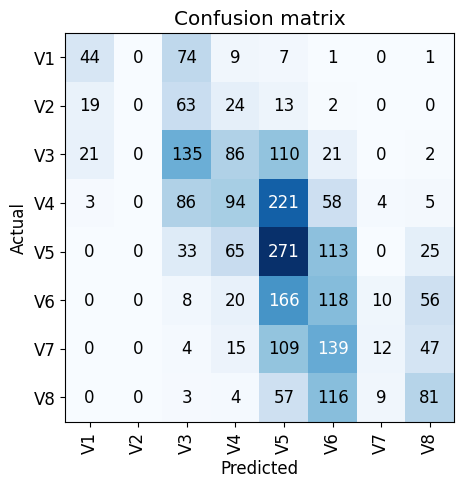

In [ ]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()